 2 Neural network classification with Pytorch

Classifiction is a problem if predicting whether something is one thing or aanother(or could be multiple things kinda like options)

In [63]:
## 1. make classification data and get it ready
import sklearn ## this popular Machine learning library and Pytorch is mainly focus on deep learning
# and this sklearn is already installed in google colab

In [64]:
from sklearn.datasets import make_circles

#Making 1000 samples
samples = 1000

#create the circles
X, y = make_circles(samples,
                    noise=0.05, #this is the randomness we can set any value upto us
                    random_state=42)

In [65]:
len(X), len(y)

(1000, 1000)

In [66]:
print(f"First 5 samples of X:\n{X[:5]}")
print(f"First 5 samples of y:\n{y[:5]}")


First 5 samples of X:
[[ 0.74220688  0.24668576]
 [-0.7340323   0.16869164]
 [-0.82985872  0.22195899]
 [-0.42913559  0.67223019]
 [ 0.44560223 -0.89493556]]
First 5 samples of y:
[1 1 1 1 0]


In [67]:
#make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1":X[:, 0], #is the index 0 of X so it would be 0.74220688 from above result
                        "X2":X[:, 1], #is the index 1 of X so it would be 0.24668576 from above result
                        "label": y})  #0.74220688  0.24668576 count as 1 in y same goes to other output above at last it say 0 for some reason
circles.head(10)

,X1,X2,label
0,0.742207,0.246686,1
1,-0.734032,0.168692,1
2,-0.829859,0.221959,1
3,-0.429136,0.672230,1
4,0.445602,-0.894936,0
5,-0.469885,0.708037,1
6,-0.016045,0.805623,1
7,0.759623,0.159526,1
8,-0.175692,-0.799837,1
9,-0.110616,1.042207,0


In [68]:
circles.label.value_counts() #here we have 500 data for both level red dot and blue dot

,count
label,
1,500
0,500


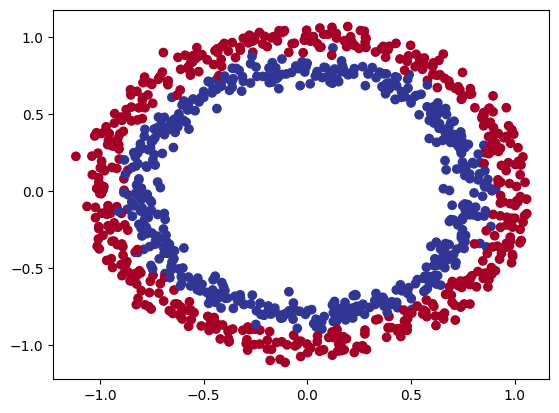

In [69]:
# Visualize  the data which we got in above results
import matplotlib.pyplot as plt

plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y, #color with label
            cmap=plt.cm.RdYlBu); #here cmap stands for color map

            #here we are seeing the circle dataset which comes from sklearn toy dataset

#Note: the data we are working with is also called Toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice

In [70]:
#1.1 check input and output shapes

X.shape, y.shape # Here X has 2 Features and y has nothing single number as its called a scaler
# X is feature and y is a label

((1000, 2), (1000,))

In [71]:
X

array([[ 0.74220688,  0.24668576],
       [-0.7340323 ,  0.16869164],
       [-0.82985872,  0.22195899],
       ...,
       [-0.12823057, -0.82613318],
       [ 0.66090453, -0.79319015],
       [ 0.27841491,  0.96735953]])

In [72]:
# view the first example of feautures and labels

X_sample = X[0]
y_sample = y[0]

print(f"Value of one sample of X:{X_sample} and same for y:{y_sample}")
print(f"Shapes for one sample of X:{X_sample.shape} and same for y:{y_sample.shape}")

Value of one sample of X:[0.74220688 0.24668576] and same for y:1
Shapes for one sample of X:(2,) and same for y:()


##Turn data into tensors and create train test splits

In [73]:

import torch
torch.__version__


'2.5.1+cu121'

In [74]:
type(X), X.dtype # HEre the default numpy datatype is float64
#however the default datatype for pytorch is float32
#makesure that the X.dtype shows float64/numpy.ndarray first and then run below code

(numpy.ndarray, dtype('float64'))

In [75]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float) #here we are converting the numpy(X) to the torch for float32
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7422,  0.2467],
         [-0.7340,  0.1687],
         [-0.8299,  0.2220],
         [-0.4291,  0.6722],
         [ 0.4456, -0.8949]]),
 tensor([1., 1., 1., 1., 0.]))

In [76]:
type(X), X.dtype, y.dtype # here we got the data in Tensors

(torch.Tensor, torch.float32, torch.float32)

In [77]:
#split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,       #set the feature first and then the labels same as mentioned
                                                    y,
                                                    test_size = 0.2, #0.2 = 20% of the data will be test and 80% will be train and if we want to have 50-50 split then use 0.5
                                                    random_state=42) #this same as manual_seed(42) it will get similar random split

In [78]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

#Building the model

#let's build a model to classify the Blue and Red dots
#To do that we want the following steps to do:
#1. Setup device agonistic code and code will run on an accelerator(GPU) if there is one
#2. Construct a model (By subclassing 'nn.module')
#3. Define a loss function and optimizer
#4. Create a training and test loops


In [79]:
#import Pytorch and nn
import torch
from torch import nn

#make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [80]:
X_train

tensor([[ 0.6772, -0.4456],
        [ 0.6030, -0.7328],
        [-1.0219, -0.1066],
        ...,
        [ 0.0011, -1.0504],
        [ 1.0259,  0.1799],
        [ 0.5597, -0.5673]])

So we have setup the device agnostic code, will create a model:
1. Subclasses 'nn.module' (almost all model in pytorch subclass 'nn.module')
2. Create two 'nn.Linear()' layers that are capable of handling the shapes of our data
3. Define the 'forward()' method that outlines forward pass(or forward computation) of the model
4. Instatiate an instance of out model class and send it to the target device

In [81]:
X_train.shape

torch.Size([800, 2])

In [82]:
y_train[:5]

tensor([1., 0., 0., 0., 1.])

In [83]:
#1. Construct a model that subclasses nn.module
#here we are trying to seprate the red and blue cirles which we have seen above in plt chart
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    #2. Create two nn.linear layers capable of handling the shapes of data
    self.layer_1 = nn.Linear(in_features=2, out_features=5) #in_features is going to be 2 as X_train has 2 feautures as input feature and for
                                                            #out_features we need to look y_train and it has 1. shape in y first position and also we can change to 5 so that model can learn more. as well and could mention multiples of 8 so 64,256......
    self.layer_2 = nn.Linear(in_features=5,out_features=1)# here we need to match with out_features layer to the in_feature layer = 5 which is hidden layer and out_feature is = 1

    #3. Define forward() method which outline the forward pass
    def forward(self, x):
      return self.layer_2(self.layer_1(x)) #x-> It goes into the layer_1 -> and the output of layer_1 goes to -> layer_2 -> output





In [84]:
 #4.Instantiate the instance of our model class and send it to the target
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [85]:
device

'cpu'

In [86]:
next(model_0.parameters()).device #will check which device its been working on now

device(type='cpu')

In [87]:
#Replicate the model above using nn.Sequential()

model_0 = nn.Sequential(
          nn.Linear(in_features=2, out_features=5),
          nn.Linear(in_features=5, out_features=1)).to(device) #and will send this to device

model_0




Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [88]:
model_0.state_dict()  #'0.' is 0th layer and '1.' is the next layer about you can see
"""0.weight has 10 output: tensor([[-0.6906, -0.5069],
                      [-0.1537,  0.6889],
                      [-0.3696, -0.5877],
                      [-0.6403, -0.4153],
                      [-0.0722,  0.6794]])     why 10 output because  2*5 = 10

                      0.bias', tensor([-0.2819, -0.0825,  0.1102,  0.2467,  0.4798] : has five output because we have set out_feature = 5
                      '1.weight',tensor([[-0.1564,  0.2690, -0.1036,  0.3569, -0.3949]])): it has five in_features = 5
                      """

"0.weight has 10 output: tensor([[-0.6906, -0.5069],\n                      [-0.1537,  0.6889],\n                      [-0.3696, -0.5877],\n                      [-0.6403, -0.4153],\n                      [-0.0722,  0.6794]])     why 10 output because  2*5 = 10\n\n                      0.bias', tensor([-0.2819, -0.0825,  0.1102,  0.2467,  0.4798] : has five output because we have set out_feature = 5\n                      '1.weight',tensor([[-0.1564,  0.2690, -0.1036,  0.3569, -0.3949]])): it has five in_features = 5\n                      "

In [89]:
#make predictions with model
#here we are trying predict whether the dot is red dot or a blue dot or 0 or 1.
with torch.inference_mode():
  untrained_pred = model_0(X_test.to(device))
  print(f"Length of predictions: {len(untrained_pred)},Shape: {untrained_pred.shape}")
  print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
  print(f"\n First 10 predictions:\n{untrained_pred[:10]}")
  print(f"\n First 10 labels:\n{y_test[:10]}")





Length of predictions: 200,Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

 First 10 predictions:
tensor([[0.3250],
        [0.3093],
        [0.2913],
        [0.3351],
        [0.1839],
        [0.1753],
        [0.2257],
        [0.1951],
        [0.2924],
        [0.3115]])

 First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [90]:
X_test[:10], y_test[:10] #here we have 2 input feature and then 5 hidden layers and 1 output feature

(tensor([[-0.3625,  0.6737],
         [ 0.0591,  0.9342],
         [-0.6859, -0.3035],
         [-0.2535,  0.9820],
         [ 0.3849, -0.7893],
         [ 0.6429, -0.6119],
         [ 0.8778,  0.5384],
         [ 1.0174,  0.1922],
         [-0.7351, -0.3463],
         [ 0.0478,  0.9578]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

In [91]:
 #2.1 Setup the loss function and optimizer

 #question need to use which loss function or optimizer? loss function will measure how wrong our model prediction are.
 # ***there are two for regression MAE or MSE(mean absolute error or mean squared error).

 #***for classification there is binary cross entropy or categorical cross entropy (cross entropy)

 #for optimizer two of the most common and useful are SGD and adam,
 #however pytorch has built in options


 #For the loss function we are using now 'torch.nn.BECwithLogitLoss() and for Binary cross entropy(BCE) need to check the atriclehttps://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a
 #for logit in deep learning: https://stackoverflow.com/questions/41455101/what-is-the-meaning-of-the-word-logits-in-tensorflow
 #for different optimizer need to see 'torch.optim'



In [92]:
#setup the loss function there are two loss here
#loss_fn = nn.BCELoss() #BCELoss = it requires input to have gone through the sigmoid activation function prior to input to BCELoss

loss_fn = nn.BCEWithLogitsLoss() #this is sigmoid actication function builtin already

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.1)

In [93]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.3948, -0.1807],
                      [-0.4035, -0.2421],
                      [-0.5283,  0.2522],
                      [ 0.5473, -0.6657],
                      [ 0.1642,  0.3653]])),
             ('0.bias', tensor([ 0.1282, -0.2518,  0.3691,  0.3716,  0.2644])),
             ('1.weight',
              tensor([[-0.0786, -0.1184,  0.0478, -0.0790, -0.1333]])),
             ('1.bias', tensor([0.2859]))])

In [94]:
#Calculate the accuracy - out of 100 examples, from the model to get it right
def accuracy(y_true,y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

#3.Train model

#to train the model, we need to build the training loop
1.Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward(backpropagation)
5. Optimzier (gradient descent)

In [95]:
# 3.1 Going from raw logits -> prediction probabilities -> prediction labels
# Our model outputs are going to be the raw output and it would be "logits"
# we can convert these "logits" into prediction probablilites by passing them to a activation function(ex: sigmoid for binary crossentropy and softmax for multiclass classification)

#Then convert our model to prediction probailities to "Prediction labels" by either rounding them or taking the 'argmax()'.

In [96]:
#View first 5 outputs of the forward pass on the test data
#important**** whenever we need to make prediction we need to eval() the model and then mention torch.inference_mode()
# and if need to train the model then turn it to train model and then inference.mode()
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[0.3250],
        [0.3093],
        [0.2913],
        [0.3351],
        [0.1839]])

In [97]:
y_test[:5] # we need the same ouput from above or vise versa it should match something

tensor([1., 0., 1., 0., 1.])

In [98]:
#Use the sigmoid activation function on the model logits and turn into prediction probabilities
# we are sigmoid as Binary classification for Output activation is Sigmoid

y_pred_prob = torch.sigmoid(y_logits)
y_pred_prob

tensor([[0.5805],
        [0.5767],
        [0.5723],
        [0.5830],
        [0.5458]])

In [99]:
#for our predicition probaility values, we need to perform a range-style rounding on them:
#"y_pred_prob" >= 0.5 we set 'y=1' (class 1) #it would be red or blue dot, also we can adjust this value 0.7
#"y_prod_prob" < 0.5  we set 'y=0' (class 0)

In [100]:
# Find the predicted labels
y_preds = torch.round(y_pred_prob)

#in full this is(logits -> pred pros -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

#check for equality
print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))

#get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([1., 1., 1., 1., 1.])

In [101]:
y_test[:5] #this would change as we have output above

tensor([1., 0., 1., 0., 1.])

#3.2 Building a training and testing Loop

In [102]:
torch.manual_seed(42)

#Set the number of epochs
epochs = 100

#put the data
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, t_test = X_test.to(device), y_test.to(device)

#Building training and evaluation loop
for epoch in range(epochs):
  ##Training
  model_0.train()

  #1.Forward pass,   also this is little different than other forward pass as we have logits
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) #Here are adding torch.round(torch.sigmod()) sigmoid is acitvation function which convert y_logits into prediction probalities and then predition labels


  #2. Calculate  loss/accuracy
  #loss = loss_fn(torch.sigmoid(y_logits), #nn.BCELoss expects prediction probalities as input
  #              y_train)
  loss = loss_fn(y_logits,y_train) #nn.BCEWithLogitsLoss expects raw logits as input which explain below block

  acc = accuracy(y_true=y_train, #look skilearn to know why this in order
                    y_pred=y_pred)

  #3. optimizer zero grad
  optimizer.zero_grad()

  #4. Loss backward (baackpropogation)
  loss.backward()

  #Optimizer step (gradient descent)
  optimizer.step


## Testing
  model_0.eval()
  with torch.inference_mode():
    #1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #2. Calculate the test loss/accuracy
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy(y_true = y_test,
                           y_pred = test_pred)

 #Print out

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} |  Train Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss:{test_loss:.5f}, Test acc:{test_acc:.2f}%")


Epoch: 0 |  Train Loss: 0.70172, Acc: 50.00% | Test Loss:0.70262, Test acc:50.00%
Epoch: 10 |  Train Loss: 0.70172, Acc: 50.00% | Test Loss:0.70262, Test acc:50.00%
Epoch: 20 |  Train Loss: 0.70172, Acc: 50.00% | Test Loss:0.70262, Test acc:50.00%
Epoch: 30 |  Train Loss: 0.70172, Acc: 50.00% | Test Loss:0.70262, Test acc:50.00%
Epoch: 40 |  Train Loss: 0.70172, Acc: 50.00% | Test Loss:0.70262, Test acc:50.00%
Epoch: 50 |  Train Loss: 0.70172, Acc: 50.00% | Test Loss:0.70262, Test acc:50.00%
Epoch: 60 |  Train Loss: 0.70172, Acc: 50.00% | Test Loss:0.70262, Test acc:50.00%
Epoch: 70 |  Train Loss: 0.70172, Acc: 50.00% | Test Loss:0.70262, Test acc:50.00%
Epoch: 80 |  Train Loss: 0.70172, Acc: 50.00% | Test Loss:0.70262, Test acc:50.00%
Epoch: 90 |  Train Loss: 0.70172, Acc: 50.00% | Test Loss:0.70262, Test acc:50.00%


In [103]:
#2. Calculate  loss/accuracy (Explanation)
#Here we are using loss_fn(y_logits) it take input y_logits, because we are using loss_fn = BCEWithLogitsLoss() function above so it will take input as logits: and we are using for now as its stable
# also if we use with logits then it follows like this below:
# loss_fn_without_logits = nn.BCELoss() this will output: BCELoss() function only


#4. Make predictions and evaluate  the model to see: as the Model is learning or not
#Visualize the model how the data looks
#Also we are importing plot_decision_boundry()





In [104]:
import requests
from pathlib import Path #this allows us to create the file path

#Download the helper functions from Learn Pytorch repo(if its not downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists will not download")
else:
  print("Downloading the helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py") # we need to get this in raw verion of it. so goto github  repo and find Raw
  with open("helper_functions.py","wb") as f: # wb:write binary
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary


helper_functions.py already exists will not download


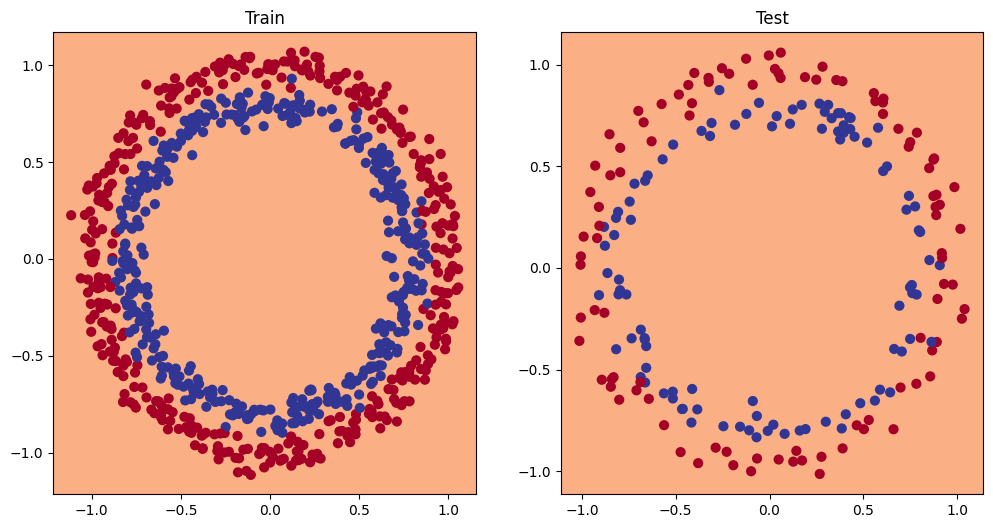

In [105]:
#plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1) #here 1 is number of rows, 2 is number of columns, 1 is the index which appears on the first slot
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")

plot_decision_boundary(model_0,X_test,y_test)


#5. Imporving the Model

In [106]:
#Add the more layers so that model would have more chances to learn about the patterns in the data(From model perspective)
# Add more hidden units so that we can move from 5 hidden units to 10 hidden units
#Fir for longer: for example use epochs:1000 so it has longer data
# changing the activation function
#Change the learning rate
#Change the loss function

#These options are all from a models perspective because they deal directly with the model
#if this options are all values we(ML engineer or Data scientists) can change as they referred to "hyperparameters"
# hyperparatmeters are which you can see from line1 to 7in this block

#Let's try and improve our model by:
#- Adding more hidden units: from 5 to-> 10
#- Increase the number of layers: from 2 to> 3
#- Increase the number of epochs:from 100 to> 1000

In [107]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10) #We have mention 2 in_features as our X_train has two output features
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1) #out_feautures is 1 as y_train is one number

  def forward(self, x):
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x)))# this way of writing operations leverages speed ups where possible behind the scenes

model_1 = CircleModelV1().to(device)
model_1




CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [108]:
#Create a loss functions
loss_fn = nn.BCEWithLogitsLoss()

#Create an Optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr=0.1)

#Write a training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

#put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ##Training
  model_1.train()
  #1. Forward Pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) #logits -> Pred probabilities->Prediction

  #2.Calcluate the loss/accuracy
  loss = loss_fn(y_logits, y_train) #We are declaring y_logits as we are using BCElogitsloss()
  acc = accuracy(y_true=y_train,
                    y_pred=y_pred)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Loss backwards(backpropagation)
  loss.backward()

  #5. Optimizer step(gradient descent)
  optimizer.step()

  ##Testing
  model_1.eval()
  with torch.inference_mode():
    #1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #2. Calculate the loss
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy(y_true=y_test,
                           y_pred=test_pred)


  #Print out all the things
  if epoch % 100 == 0:
    print(f"Epoch:{epoch} | Loss: {loss:.5f}, Acc: {acc:.2f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch:0 | Loss: 0.69393, Acc: 51.00 | Test loss: 0.69264, Test acc: 50.00%
Epoch:100 | Loss: 0.69305, Acc: 50.50 | Test loss: 0.69379, Test acc: 48.00%
Epoch:200 | Loss: 0.69299, Acc: 51.12 | Test loss: 0.69436, Test acc: 47.00%
Epoch:300 | Loss: 0.69298, Acc: 51.00 | Test loss: 0.69456, Test acc: 46.00%
Epoch:400 | Loss: 0.69298, Acc: 51.38 | Test loss: 0.69463, Test acc: 45.50%
Epoch:500 | Loss: 0.69298, Acc: 51.62 | Test loss: 0.69465, Test acc: 45.50%
Epoch:600 | Loss: 0.69298, Acc: 51.62 | Test loss: 0.69466, Test acc: 45.50%
Epoch:700 | Loss: 0.69298, Acc: 51.62 | Test loss: 0.69466, Test acc: 45.50%
Epoch:800 | Loss: 0.69298, Acc: 51.62 | Test loss: 0.69466, Test acc: 45.50%
Epoch:900 | Loss: 0.69298, Acc: 51.62 | Test loss: 0.69466, Test acc: 45.50%


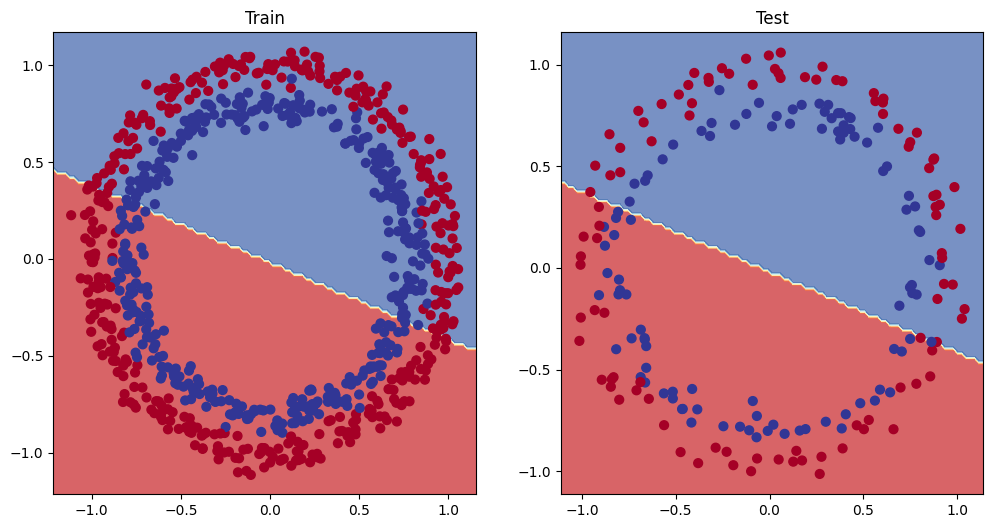

In [109]:
#Plot the decision boundary
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1) #here 1 is number of rows, 2 is number of columns, 1 is the index which appears on the first slot
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")

plot_decision_boundary(model_1,X_test,y_test)


## 5.1 preparing data to see if our model can fit a straight line
#One way to troubleshoot to a larger problem is to test out smaller problem



In [110]:
# Create some data(same as notebook 1)
weight = 0.7
bias = 0.3
start = 0
end = 1

step = 0.1

#Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias #Linear regression formula(without epsilon)

#Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

10


(tensor([[0.0000],
         [0.1000],
         [0.2000],
         [0.3000],
         [0.4000]]),
 tensor([[0.3000],
         [0.3700],
         [0.4400],
         [0.5100],
         [0.5800]]))

In [111]:
#Create train and test splits
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression  = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

#Check the length of each
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)



(8, 2, 8, 2)

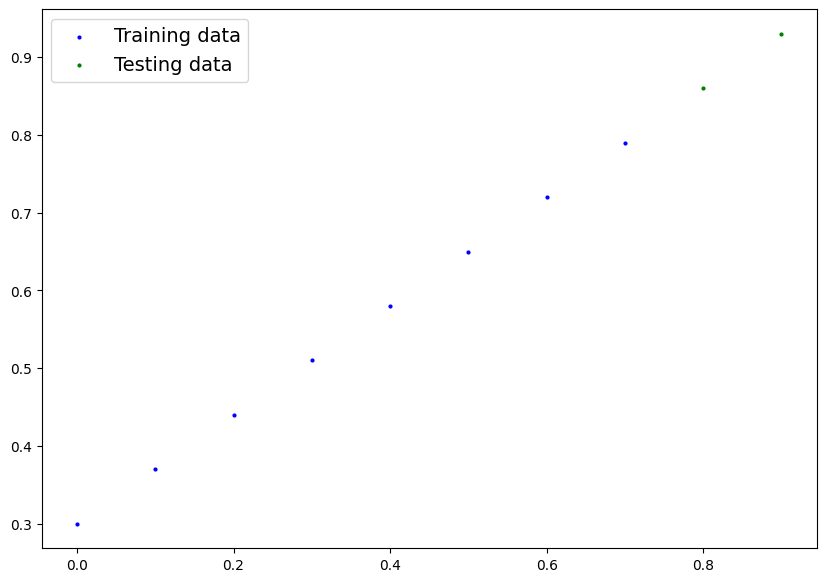

In [112]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression);

In [113]:
X_train_regression[:10],y_train_regression[:10] #here we have only one input features for X_train.... and y_train.....

(tensor([[0.0000],
         [0.1000],
         [0.2000],
         [0.3000],
         [0.4000],
         [0.5000],
         [0.6000],
         [0.7000]]),
 tensor([[0.3000],
         [0.3700],
         [0.4400],
         [0.5100],
         [0.5800],
         [0.6500],
         [0.7200],
         [0.7900]]))

#5.2 Adjust 'model_1' to fit a straight line

In [114]:

# Here we need one in_feature intead of two which you can see below
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [115]:
#Same architecture as model_1(but using nn.Sequential())
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [116]:
#Loss and Optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr=0.01)

In [117]:
#Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Set the number of epochs
epochs = 1000

#Put the data on the target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)


#Training
for epoch in range(epochs):
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #Testing

  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)


  #Print the data
  if epoch % 100 == 0:
    print(f"Epoch:{epoch} |Loss:{loss:.5f} |Test_loss:{test_loss:.5}")

Epoch:0 |Loss:0.74239 |Test_loss:0.89524
Epoch:100 |Loss:0.02227 |Test_loss:0.0045549
Epoch:200 |Loss:0.01665 |Test_loss:0.0024131
Epoch:300 |Loss:0.01750 |Test_loss:0.0053518
Epoch:400 |Loss:0.01461 |Test_loss:0.0056408
Epoch:500 |Loss:0.01899 |Test_loss:0.001435
Epoch:600 |Loss:0.01435 |Test_loss:0.0048963
Epoch:700 |Loss:0.01877 |Test_loss:0.0017166
Epoch:800 |Loss:0.01647 |Test_loss:0.0019268
Epoch:900 |Loss:0.01779 |Test_loss:0.0011661


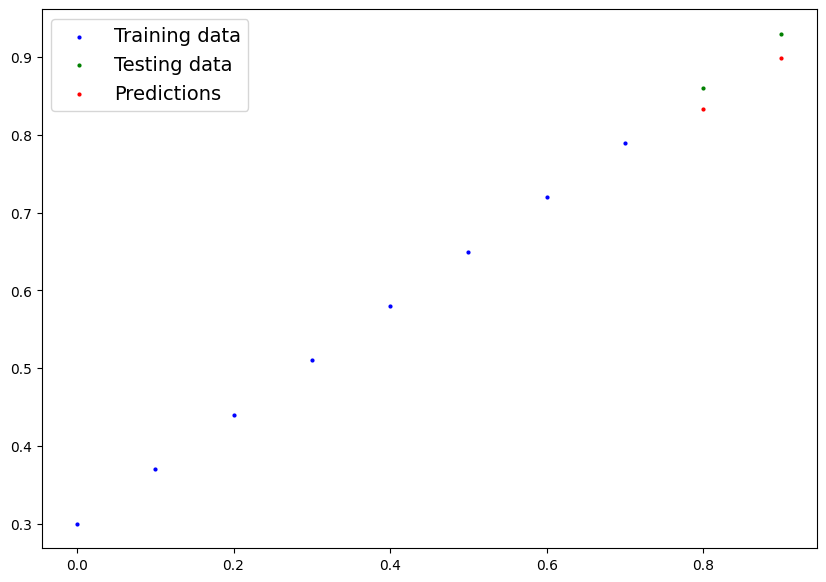

In [118]:
#Turn on evaluation mode
model_2.eval()

#make predictions(inference)
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

#Plot data and predictions
#make sure numpy uses cpu instead of gpu. so if below code doesnot work on gpu change X_train_regression.cpu() and next line all of them
plot_predictions(train_data = X_train_regression,
                 train_labels = y_train_regression,
                 test_data= X_test_regression,
                 test_labels = y_test_regression,
                 predictions=y_preds)

#6. The missing piece: Non-linearity

In [119]:
#what patterns could we draw if you were given an infinite amount of a straight and non-straight lines?
#or in machine learning terms, an infinite (really its fininte) of linear and non-linear functions?

#6.1 recreating non-linear data(red and blue circles)


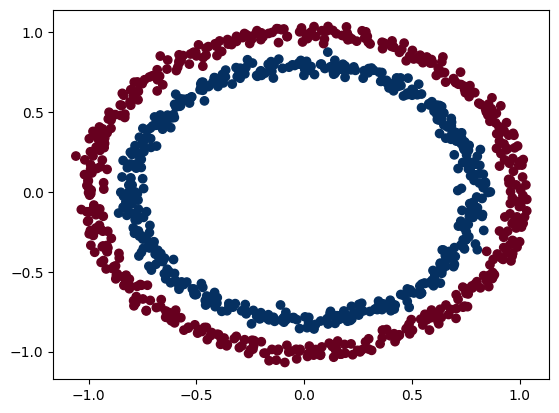

In [120]:
#make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);

In [121]:
#Convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

#Turn data into the tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

#split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

X_train[:5], y_train[:5]





(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [122]:
## 6.2 Building a model with non-linearity

# Linear = strainght line graph
# nonlinear = non-straight line graph

#Artifical neurak networks are large combination of linear(straight) and nonstraight(nonlinear) functions which are potentailly able to find the pattern in data

#Build a model with non-linear activation
from torch import nn

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() #relu is a nonLinear activation function

  def forward(self, x):
    # WHere should we put the nonLinear activation function?
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x))))) #Here data goes first for layer_1 and output goes into the relu function and goes
                                                                              # to layer_2 and for for laye_3 it stays as is as we don't have relu at the end
model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [123]:
#Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),
                            lr = 0.1)



In [124]:
#another binary classification problem would be:
#spam or not spam
# credit cards = fraud or not fraud
#insurance claims = at fault or not fault

#6.3 training a model non-linearity

In [132]:
#Random seeds
torch.manual_seed(42)
#torch.cuda_manual_seed(42)

#Put all data on the target device
X_train, y_train = X_train.to(device),y_train.to(device)
X_train, y_test = X_test.to(device), y_test.to(device)

#Loop through the data
epochs = 1000

for epoch in range(epochs):
  ###Training
  model_3.train()

  #1. Forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) #logits -> prediction probalities -> prediction labels

  #2. Calculate the loss
  loss = loss_fn(y_logits, y_train) #BCEwithLogitLoss(Takes in logits as first input)
  acc = accuracy(y_true = y_train,
                 y_pred=y_pred)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Loss backward
  loss.backward()

  #5. Step the optimizer
  optimizer.step()


  ## Testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy(y_true=y_test,
                        y_pred=test_pred)

    #Print out what's this happening

    if epoch % 1000 == 0:
      print(f"Epoch: {epoch} | Loss:{loss:.4f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")


ValueError: Target size (torch.Size([800])) must be the same as input size (torch.Size([200]))

In [125]:
model_3.state_dict() # Just to add if we add more parameters then more compute is required

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1